#### Useful links about Notebook:

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html
    

Issue was during import seaborn after conda update command
For some reason import fails for scipy.special
https://stackoverflow.com/questions/39020361/python-scipy-module-import-error-due-to-missing-ufuncs-dll

I've copied LIBIFCOREMD.DLL and LIBMMD.DLL from G:\Progs\Anaconda\envs\test\Library\bin to G:\Progs\Anaconda\Library\bin


# Loading of data

In [90]:
import os
import os.path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.display import display

import warnings
warnings.filterwarnings('ignore')

core_path = os.environ['GITHUB_PATH']
file_path = os.path.join(core_path, 'education/kaggle/Titanic/train.csv')

ds = pd.read_csv(file_path)

#pandas intro
#https://pandas.pydata.org/pandas-docs/stable/dsintro.html
#Series is a one-dimensional labeled array capable of holding any data type
#s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
#You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 
#Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

#Shows info (useful to check NA and column types)
#ds.info()

#Shows first lines:
#display(ds)
ds.head()
#Shows columns
#ds.columns

#Shows all table:
#ds

#Columns by dot:
#ds.Sex

#By name:
#ds['Sex']
#ds[['Sex', 'Age']]

#Slices, for example last 3 records:
#ds[-3:]

#Shows selected rows and columns:
#ds.ix[0:1, 'Sex'] #For some reason 0:1 is 0,1, not 0 only!

#ds.ix[[0,2,5], ['Sex', 'Age']]

#Queries:
#ds[(ds.Age > 30) & (ds.Sex == 'male')]

#Statistics:
#ds['Age'].mean()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Simple statistics

### Survived by class

            1   2    3
Survived  136  87  119
Died       80  97  372
Survive rate for class 1: 0.63
Survive rate for class 2: 0.47
Survive rate for class 3: 0.24


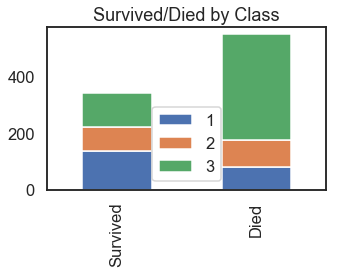

In [91]:
%matplotlib inline
#import seaborn
#seaborn.set() 

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
#Counts unique values in Series Pclass
survived_class = ds[ds['Survived'] == 1]['Pclass'].value_counts()
dead_class = ds[ds['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']

#Following data frame contans the 2 Series as columns, not rows:
#df_class2 = pd.DataFrame({'Survived': survived_class, 'Died': dead_class})

#survived_class
df_class.plot(kind='bar', stacked=True, figsize=(5,3), title="Survived/Died by Class")
print(df_class)

#df_class.ix[0,0] is not working! Because we have numeric indexes (labels) for columns as classes 1,2,3
#So 0,0 element s ix[0,1], we should use iloc for array-like element access ix[0,1] == iloc[0,0]

for i in df_class.columns:
    cl_surv_rate = df_class.ix[0,i] / df_class.ix[:,i].sum()
    print('Survive rate for class {0}: {1:.2f}'.format(i, cl_surv_rate))

### Survived by sex

Survive rate for male: 0.19
Survive rate for female: 0.74


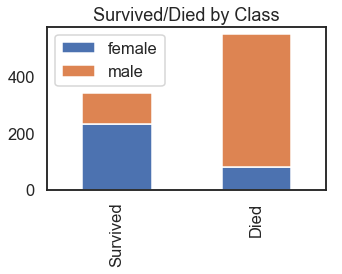

In [92]:
survived_sex = ds[ds.Survived == 1]['Sex'].value_counts()
died_sex = ds[ds.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, died_sex])
df_sex.index= ['Survived','Died']

df_sex.plot(kind='bar', stacked=True, figsize=(5,3), title="Survived/Died by Class")
#print(df_sex)
male_survived_rate = df_sex.male[0] / df_sex.male.sum()
female_survived_rate = df_sex.female[0] / df_sex.female.sum()

print('Survive rate for male: {0:.2f}'.format(male_survived_rate))
print('Survive rate for female: {0:.2f}'.format(female_survived_rate))

ds['SexInt'] = ds.Sex.map({'female': 1, 'male': 0})

### Survived by age

Stack of men = 0.65, women = 0.35
Man class 3 survived rate = 0.14
Stack of class 3 man = 0.39, from men = 0.60


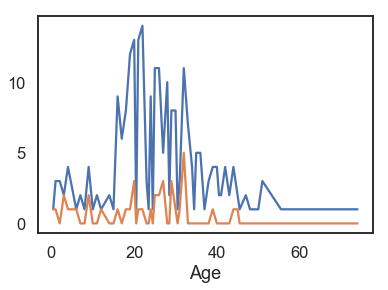

In [93]:
#ds[ds.Age > 0][['Age', 'Survived']].groupby('Age').count()
#ds[(ds.Age > 1) & (ds.Age < 5)]

#It's possible to apply more than one aggregations:
#grouped['C'].agg([np.sum, np.mean, np.std])
#ages = ds[ds.Pclass == 1].groupby('Age').count().PassengerId
#ages_surv = ds[ds.Pclass == 1].groupby('Age').sum().Survived

ages = ds[(ds.Pclass == 3) & (ds.Sex == 'male')].groupby('Age').count().PassengerId
ages_surv = ds[(ds.Pclass == 3) & (ds.Sex == 'male')].groupby('Age').sum().Survived
ages.plot()
ages_surv.plot()

men_count = len(ds[ds.Sex == 'male'])
men_share = men_count / len(ds)
women_share = 1 - men_share 
print('Stack of men = {0:.2f}, women = {1:.2f}'.format(men_share, women_share))

man_cl3 = ds[(ds.Sex == 'male') & (ds.Pclass == 3)].count().PassengerId
man_cl3_surv = ds[(ds.Sex == 'male') & (ds.Pclass == 3) & (ds.Survived)].count().PassengerId
print('Man class 3 survived rate = {0:.2f}'.format(man_cl3_surv/man_cl3))
print('Stack of class 3 man = {0:.2f}, from men = {1:.2f}'.format(man_cl3 / len(ds), man_cl3 / men_count))

#man_cl3 = ds[(ds.Sex == 'male') & (ds.Pclass == 3) & (ds.Age >= 25) & (ds.Age < 30)]



Man class 1 survived rate = 0.47
Stack of class 1 man = {0:.2f} 0.08080808080808081


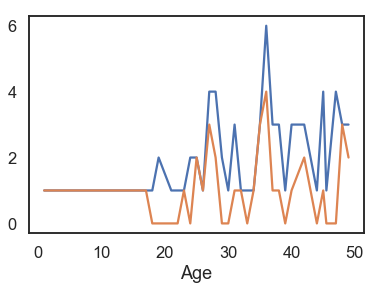

In [94]:
ages1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].groupby('Age').count().PassengerId
ages_surv1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].groupby('Age').sum().Survived
ages1.plot()
ages_surv1.plot()

man_cl1 = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50)].count().PassengerId
man_cl1_surv = ds[(ds.Pclass == 1) & (ds.Sex == 'male') & (ds.Age < 50) & (ds.Survived)].count().PassengerId
print('Man class 1 survived rate = {0:.2f}'.format(man_cl1_surv/man_cl1))
print('Stack of class 1 man = {0:.2f}', man_cl1 / len(ds))

# Test data loading

In [95]:
test_file_path = os.path.join(core_path, 'education/kaggle/Titanic/test.csv')
test_ds = pd.read_csv(test_file_path)

# NA filling

## Fare NA

In [96]:
def fill_fare_na(f):
    if f.Fare.isnull().any():
        print('Number rows with Null Fare: {}'.format(f[f.Fare.isnull()].shape[0]))
        cl = f[f.Fare.isnull()].Pclass.values[0]
        cl_mean_fare = ds.groupby('Pclass').Fare.mean()[cl]
        print('Avg fare for class {} set: {}'.format(cl, cl_mean_fare))
        f.Fare.fillna(cl_mean_fare, inplace=True)
    
    if f.Fare.isnull().any():
        print('Number rows with Null Fare again!!!')
        print(f[f.Fare.isnull()].Fare)
        
fill_fare_na(test_ds)

Number rows with Null Fare: 1
Avg fare for class 3 set: 13.675550101832997


## Mean age by Mr,Ms,... prefix groups

['Capt.' 'Col.' 'Countess.' 'Don.' 'Dona.' 'Dr.' 'Jonkheer.' 'Lady.'
 'Major.' 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.'
 'Sir.']


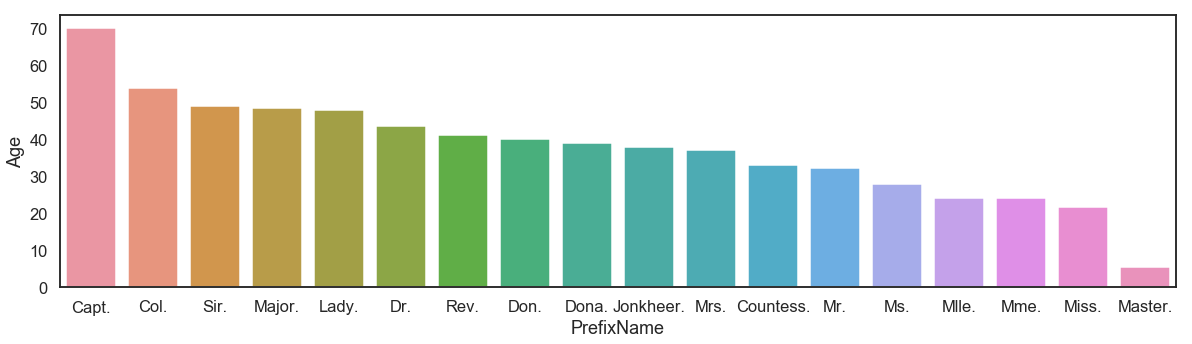

In [97]:
import seaborn as sns

#First we should get all possible prefixes, using exception for example:
rp = ds[~ds.Name.str.contains('Mr')]
rp = rp[~rp.Name.str.contains('Miss')]
rp = rp[~rp.Name.str.contains('Master')]
rp = rp[~rp.Name.str.contains('Dr')]
rp = rp[~rp.Name.str.contains('Rev')]
rp = rp[~rp.Name.str.contains('Don')]
rp = rp[~rp.Name.str.contains('Ms')]
rp = rp[~rp.Name.str.contains('Col')]
rp = rp[~rp.Name.str.contains('Mlle')]
rp = rp[~rp.Name.str.contains('Major')]
rp = rp[~rp.Name.str.contains('Mme')]
rp = rp[~rp.Name.str.contains('Capt')]
rp = rp[~rp.Name.str.contains('Countess')]
rp = rp[~rp.Name.str.contains('Jonkheer')]
#display(rp)
#print(len(rp))
#we can notice that all prefixes have point(.) and try to find it using regexp:

#display(ds.Name)

#returns tuple (prefix map<name,id> and list of all prefix names)
def get_all_prefixes(frame):
    frame_prefixes = frame.Name.str.findall('[\w]{2,}\.')
    #now we can't apply unique() method because findall returns Serties based on list and it's not for unique()
    #rp.unique()
    #print(rp.apply(str))

    prefixes_objects = np.unique(frame_prefixes.values)
    prefixes={}
    for i in range(len(prefixes_objects)):
        prefixes[prefixes_objects[i][0]] = i
        
    #Task1: convert Series after findall to Series of strings
    #Task2: the same for numpy array
    #1. After find all we have Series of Python lists of string
    #print(type(rp[0]))
    #print(type(rp[0][0]))

    first_elem_f = lambda x: x[0]
    #join_f = lambda x: ''.join(x)
    #rp_str = frame_prefixes.map(first_elem_f)
    #print(rp_str )

    #2. First we can create function for vector from function of one argument:
    join_np = np.vectorize(first_elem_f)
    all_prefixes_list = join_np(prefixes_objects)
    
    #Second way:
    #print_f = lambda x: print(x[0])
    #y_str2 = np.apply_along_axis(print_f, 0, y)
    #This is not working because it seems may not be applied for 1d array, it will call once for whole array
    #print(y_str2)

    #Why ravel isn't working? Because we have array of list objects, not 2d array!
    #print(y.ravel())
    #yy = np.zeros(2, dtype=np.object)
    #yy[0] = ['a']
    #yy[1] = ['b']
    #print(type(yy[0]))
    
    print(all_prefixes_list)
    
    return (prefixes, all_prefixes_list)

def get_prefix_mean_age(frame, prefixes_list):
    prefix_mean_age = frame[['Prefix', 'Age']].groupby('Prefix').mean().reset_index()
    prefix_str_series = prefix_mean_age.Prefix.map(lambda x: prefixes_list[x])
    prefix_mean_age['PrefixName'] = prefix_str_series

    #prefix_names = prefix_mean_age.Prefix.map(lambda s: prefixes[s])
    #prefix_mean_age['Prefix'] = prefix_names

    #display(np.array(list('abc')))
    #display(y.map(str))
    #display(type(y))
    #display(ds[['Age', 'Prefix']])

    #prefix_mean_age['Prefix']=y.flatten()

    #display(prefix_mean_age)

    return prefix_mean_age

def fill_prefixes(frame, prefixes):
    frame_prefixes = frame.Name.str.findall('[\w]{2,}\.')
    prefix = frame_prefixes.map(lambda x: prefixes[x[0]])
    frame['Prefix'] = prefix
    
def fill_null_age(frame, prefix_mean_age):
    get_age_prefix = lambda s: s['Age'] if pd.notnull(s['Age']) else prefix_mean_age.Age[s['Prefix']]
    age_filled_by_prefix = frame.apply(get_age_prefix, axis=1)
    frame['AgeFilled'] = age_filled_by_prefix
    
#Train + test data frame    
full_ds = pd.concat([ds, test_ds])
#Takes all prefixes from all data
(prefixes, all_prefixes_list) = get_all_prefixes(full_ds)
#Calculates mean age for all data
fill_prefixes(full_ds, prefixes)
prefix_mean_age = get_prefix_mean_age(full_ds, all_prefixes_list)

fill_prefixes(ds, prefixes)
fill_prefixes(test_ds, prefixes)

#display(prefix_mean_age)

fill_null_age(full_ds, prefix_mean_age)
fill_null_age(ds, prefix_mean_age)
fill_null_age(test_ds, prefix_mean_age)

    
#display(age_filled_by_prefix)
#TODO: graph
sns.set(style="white", context="talk")
f, ax1 = plt.subplots(1, 1, figsize=(20, 5), sharex=True)


prefix_mean_age.sort_values('Age', inplace=True, ascending=False)

sns.barplot(x='PrefixName', y='Age', data=prefix_mean_age, ax=ax1)
#ax1.axhline(0, color="k", clip_on=False)
#ax1.set_ylabel("Mean age by name prefix")

#sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)



## New features

## SVM without kernel for sex and class

In [98]:
from sklearn import svm

linear_svm_model2 = svm.SVC(kernel='linear')
#linear_svm_model = clf.fit(X, y)

#map may use function
sex_int = ds['Sex'].map({'female': 1, 'male': 0})
linear_svm_train_features2 = pd.DataFrame([sex_int, ds['Pclass']]).transpose().values

linear_svm_train_y2 = ds.Survived.transpose().values
linear_svm_model2 = linear_svm_model2.fit(linear_svm_train_features2, linear_svm_train_y2)

test_sex_int = test_ds['Sex'].map({'female': 1, 'male': 0})
test_svm_train_features2 = pd.DataFrame([test_sex_int, test_ds['Pclass']]).transpose().values

test_svm_train_y2 = linear_svm_model2.predict(test_svm_train_features2)

submission1 = pd.DataFrame({'PassengerId': test_ds.
PassengerId, 'Survived': test_svm_train_y2})

submission1_file_path = os.path.join(core_path, 'education/kaggle/Titanic/submission1.csv')
submission1.to_csv(submission1_file_path, index=False)
#print(submission1)


### Cross-validation

#### default 5-fold

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_svm_model2, linear_svm_train_features2, linear_svm_train_y2, n_jobs=2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.02)


#### shuffle 5-fold

In [100]:
from sklearn.model_selection import ShuffleSplit
shuffle5_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(linear_svm_model2, linear_svm_train_features2, linear_svm_train_y2, n_jobs=2, cv=shuffle5_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.02)


Accuracy (0.78 +/- 0.02) ~ accuray from kaggle submission (0.765)

#### Tuning the hyper-parameters of an estimator

In [101]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 2, 3],
                     'C': [1, 10, 100, 1000]}]

tuned_parameters2 = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1, 2, 3],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision']
scores2 = ['precision', 'recall']

for score in scores:
    #shuffle5_cv looks better than simple 5, std 0.048 vs 0.069
    #if test_size = 0.4 than std is 0.020, but train test is small and model may be underfitted
    #kaggle problem's test set has 418 samples, train set has 891
    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=shuffle5_cv,
                           scoring='%s_macro' % score)
    clf.fit(linear_svm_train_features2, linear_svm_train_y2)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Grid scores on development set:

0.777 (+/-0.048) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 1, 'gamma': 2, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 1, 'gamma': 3, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 10, 'gamma': 2, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 10, 'gamma': 3, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 100, 'gamma': 2, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 100, 'gamma': 3, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 1000, 'gamma': 2, 'kernel': 'rbf'}
0.777 (+/-0.048) for {'C': 1000, 'gamma': 3, 'kernel': 'rbf'}


### With age without NA 

In [102]:
ds_age_notnull = ds[ds.Age.notnull()]
sex_int = ds_age_notnull['Sex'].map({'female': 1, 'male': 0})
linear_svm_train_features3 = pd.DataFrame([sex_int, ds_age_notnull.Pclass, ds_age_notnull.Age]).transpose().values
linear_svm_train_y3 = ds_age_notnull.Survived.transpose().values

#print(linear_svm_train_features3)

linear_svm_model3 = svm.SVC(kernel='rbf', gamma=2, C=1)
scores = cross_val_score(linear_svm_model3, linear_svm_train_features3, linear_svm_train_y3, n_jobs=2, cv=shuffle5_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.05)


As we see mean accuracy is less than wo age, std is more (0.05 vs 0.02 before)

### 2 age groups (adults and children)

In [103]:
ds_age_notnull_age_group = ds_age_notnull['Age'].map(lambda x: 1 if x >=18 else 0)
linear_svm_train_features3_age_group = pd.DataFrame([sex_int, ds_age_notnull.Pclass, ds_age_notnull_age_group]).transpose().values

#print(linear_svm_train_features3_age_group)

linear_svm_model3_ag = svm.SVC(kernel='rbf', gamma=2, C=1)
scores = cross_val_score(linear_svm_model3_ag, linear_svm_train_features3_age_group, linear_svm_train_y3, n_jobs=2, cv=shuffle5_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.01)


Now accuracy is much a bit, std is very little!

### Several age groups (age/10)

In [104]:
def several_age_group_cv(cv, groups=None):
    ds_age_notnull_age_div_10 = ds_age_notnull['Age'].map(lambda x: x / 10)
    linear_svm_train_features3_age_dev10 = pd.DataFrame([sex_int, ds_age_notnull.Pclass, ds_age_notnull_age_div_10]).transpose().values

    linear_svm_model3_ag_d10 = svm.SVC(kernel='rbf', gamma=2, C=1)
    scores = cross_val_score(linear_svm_model3_ag_d10, linear_svm_train_features3_age_dev10, linear_svm_train_y3, n_jobs=2, cv=cv, groups=groups)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
several_age_group_cv(shuffle5_cv)

Accuracy: 0.80 (+/- 0.02)


### Group k-fold for class

In [105]:
from sklearn.model_selection import GroupShuffleSplit
class_group_cv = GroupShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
class_groups = ds_age_notnull.Pclass.as_matrix()
several_age_group_cv(class_group_cv, groups=class_groups)

Accuracy: 0.26 (+/- 0.08)


### cross_val_predict

In [106]:
from sklearn.model_selection import cross_val_predict

ds_age_notnull_age_div_10 = ds_age_notnull['Age'].map(lambda x: x / 10)
linear_svm_train_features3_age_dev10 = pd.DataFrame([sex_int, ds_age_notnull.Pclass, ds_age_notnull_age_div_10]).transpose().values

linear_svm_model3_ag_d10 = svm.SVC(kernel='rbf', gamma=2, C=1)
predictions = cross_val_predict(linear_svm_model3_ag_d10, linear_svm_train_features3_age_dev10, linear_svm_train_y3, n_jobs=2, cv=5)
check_arr = ds_age_notnull.Survived == predictions


class_pred_df = pd.DataFrame([ds_age_notnull.Pclass, check_arr]).transpose()
display(class_pred_df.groupby('Pclass').mean())
print(check_arr.mean())


,Survived
Pclass,
1,0.731183
2,0.930636
3,0.746479


0.7871148459383753


### Survived by Age groups

In [107]:
#from sklearn import preprocessing

#http://scikit-learn.org/stable/modules/preprocessing.html#discretization
#http://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html

#age_bins = preprocessing.KBinsDiscretizer(bins=[5], encode='ordinal').fit(ds.AgeFilled)

#age_bins = ds.AgeFilled.map(lambda a: int(a / 10))

def age_discritizer(x):
    if x < 16:
        return 0
    elif x < 50:
        return 1
    else:
        return 2

age_bins = ds.AgeFilled.map(age_discritizer)
#print(age_bins)
ds['AgeBins'] = age_bins
stat = ds[(ds.SexInt == 0) & (ds.Pclass == 3)].groupby('AgeBins')['Survived'].agg([np.size, np.sum])
stat['rate'] = stat['sum']/stat['size']

stat

,size,sum,rate
AgeBins,,,
0,32,11,0.343750
1,305,36,0.118033
2,10,0,0.000000


### New model with filled Age

In [108]:
def store_submission(frame, y, n):
    submission = pd.DataFrame({'PassengerId': frame.PassengerId, 'Survived': y})
    submission.PassengerId = submission.PassengerId.astype(int)
    submission_file_path = os.path.join(core_path, 'education/kaggle/Titanic/submission{}.csv'.format(n))
    print(submission_file_path)
    submission.to_csv(submission_file_path, index=False)
    
def prepare_features2(frame, ageFilled=True):
    if ageFilled:
        ds_age_div_10 = frame['AgeFilled'].map(lambda x: x / 10)
    else:
        ds_age_div_10 = frame['Age'].map(lambda x: x / 10)
    
    sib_parch_sum = frame.SibSp + frame.Parch
    
    #if (not 'SexInt' in frame):
    frame['SexInt'] = frame.Sex.map({'female': 1, 'male': 0})
    
    features = pd.DataFrame([frame.SexInt, frame.Pclass, ds_age_div_10, sib_parch_sum]).transpose().values
    return features
    
def several_age_group_filled_age_cv(features, train_y, cv=None, groups=None):
    model = svm.SVC(kernel='rbf', gamma=0.5, C=1)
    scores = cross_val_score(model, features, train_y, n_jobs=2, cv=cv, groups=groups)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
train_features = prepare_features2(ds)
test_features = prepare_features2(test_ds)
train_y = ds.Survived.transpose().values

several_age_group_filled_age_cv(train_features, train_y, cv=shuffle5_cv)

#Second submission:
model = svm.SVC(kernel='rbf', gamma=0.5, C=1)


model.fit(train_features, train_y)
answer = model.predict(test_features)
print(len(test_ds))
store_submission(test_ds, answer, 2)

Accuracy: 0.82 (+/- 0.01)
418
G:\MYOWN\Oddcard2\education/kaggle/Titanic/submission2.csv


In [109]:
train_features2 = np.copy(train_features)
train_features2[:, 2] = train_features2[:, 2].astype(int)
print(train_features)

#ds[(ds.Name.str.len() > 30) & (ds.Sex == 'male')]
len(ds[(ds.Survived == 0) & (ds.Sex == 'male') & (ds.Pclass == 3)])

from sklearn.neighbors import KNeighborsClassifier

mm = KNeighborsClassifier()
print()

[[0.         3.         2.2        1.        ]
 [1.         1.         3.8        1.        ]
 [1.         3.         2.6        0.        ]
 ...
 [1.         3.         2.17742381 3.        ]
 [0.         1.         2.6        0.        ]
 [0.         3.         3.2        0.        ]]



In [110]:
#import matplotlib.pyplot as plt

#plt.matshow(ds.corr())

In [111]:
#import seaborn as sns
#corr = ds.corr()
#sns.heatmap(corr, 
#            xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values)

In [112]:
#sns.pairplot(ds)

In [113]:
#pd.scatter_matrix(ds, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#pd.scatter_matrix(ds, alpha = 0.3, figsize = (14,8));

### Simple features

In [114]:
from sklearn import preprocessing

#Female weight

#Class weight

def create_name_len_feature(f):
    name_len = f.Name.str.len()
    f['NameLen'] = name_len
    
def create_sex_scaled(f):
    f['SexScaled'] = f.Sex.map({'female': 3, 'male': 0})
    
def create_class_scaled(f):
    #f['ClassScaled'] = f.Pclass.map({1: 1, 2: 2, 3:-2})
    f['ClassScaled'] = f.Pclass.map({1: 1, 2: 2, 3:10})
    
def create_prefix_int(f):
    le = preprocessing.LabelEncoder()
    le.fit(f.Prefix)
    prefix = le.transform(f.Prefix)
    
def create_embarked_int(f):
    embarked = f.Embarked.fillna('S')
    le = preprocessing.LabelEncoder()
    le.fit(embarked)
    embarked = le.transform(embarked)
    f['EmbarkedLabel'] = embarked
    
#TODO: remove
def create_age_div_10(f):
    age_div_10 = f['AgeFilled'].map(lambda x: x / 10)
    f['AgeDiv10'] = age_div_10
    
def create_cabin_bool(f):
    cabin = f.Cabin.notnull()
    f['CabinBool'] = cabin
    
def create_ticket_len(f):
    f['TicketLen'] = f.Ticket.str.len()
    
def create_new_features(f):
    create_name_len_feature(f)
    create_sex_scaled(f)
    create_class_scaled(f)
    create_prefix_int(f)
    create_embarked_int(f)
    create_age_div_10(f)
    create_cabin_bool(f)
    create_ticket_len(f)

create_new_features(ds)
create_new_features(test_ds)


### Prefix feature order 

In [115]:
display(ds.groupby('Cabin').agg([np.sum, np.mean, np.std]))

PassengerId                    Survived                     Pclass       \
              sum   mean         std      sum      mean       std    sum mean   
Cabin                                                                           
A10           584  584.0         NaN        0  0.000000       NaN      1    1   
A14           476  476.0         NaN        0  0.000000       NaN      1    1   
A16           557  557.0         NaN        1  1.000000       NaN      1    1   
A19           285  285.0         NaN        0  0.000000       NaN      1    1   
A20           600  600.0         NaN        1  1.000000       NaN      1    1   
A23           631  631.0         NaN        1  1.000000       NaN      1    1   
A24           868  868.0         NaN        0  0.000000       NaN      1    1   
A26           648  648.0         NaN        1  1.000000       NaN      1    1   
A31           210  210.0         NaN        1  1.000000       NaN      1    1   
A32           186  186.0         NaN        0  0.000000       NaN      1    1   
A34           446  446.0         NaN        1  1.000000       NaN      1    1   
A36           807  807.0         NaN        0  0.000000       NaN      1    1   
A5             97   97.0         NaN        0  0.000000       NaN      1    1   
A6             24   24.0         NaN        1  1.000000       NaN      1    1   
A7            175  175.0         NaN        0  0.000000       NaN      1    1   
B101          738  738.0         NaN        1  1.000000       NaN      1    1   
B102          816  816.0         NaN        0  0.000000       NaN      1    1   
B18           854  427.0  137.178716        2  1.000000  0.000000      2    1   
B19           171  171.0         NaN        0  0.000000       NaN      1    1   
B20          1473  736.5   64.346717        2  1.000000  0.000000      2    1   
B22          1287  643.5  144.956890        1  0.500000  0.707107      2    1   
B28           892  446.0  543.058008        2  1.000000  0.000000      2    1   
B3            780  780.0         NaN        1  1.000000       NaN      1    1   
B30            55   55.0         NaN        0  0.000000       NaN      1    1   
B35          1012  506.0  192.333044        2  1.000000  0.000000      2    1   
B37           488  488.0         NaN        0  0.000000       NaN      1    1   
B38           537  537.0         NaN        0  0.000000       NaN      1    1   
B39           540  540.0         NaN        1  1.000000       NaN      1    1   
B4            195  195.0         NaN        1  1.000000       NaN      1    1   
B41           588  588.0         NaN        1  1.000000       NaN      1    1   
...           ...    ...         ...      ...       ...       ...    ...  ...   
E12           461  461.0         NaN        1  1.000000       NaN      1    1   
E121         1576  788.0   50.911688        2  1.000000  0.000000      6    3   
E17           858  858.0         NaN        1  1.000000       NaN      1    1   
E24          1410  705.0    4.242641        2  1.000000  0.000000      2    1   
E25          1086  543.0   42.426407        2  1.000000  0.000000      2    1   
E31            93   93.0         NaN        0  0.000000       NaN      1    1   
E33           524  262.0  134.350288        2  1.000000  0.000000      2    1   
E34           320  320.0         NaN        1  1.000000       NaN      1    1   
E36           310  310.0         NaN        1  1.000000       NaN      1    1   
E38           457  457.0         NaN        0  0.000000       NaN      1    1   
E40           338  338.0         NaN        1  1.000000       NaN      1    1   
E44          1013  506.5  101.116270        1  0.500000  0.707107      2    1   
E46             7    7.0         NaN        0  0.000000       NaN      1    1   
E49           836  836.0         NaN        1  1.000000       NaN      1    1   
E50           371  371.0         NaN        1  1.000000       NaN      1    1   
E58           663  663.0         NaN 

In [266]:
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold

def do_cv(model, features, train_y, cv=None, groups=None):
    scores = cross_val_score(model, features, train_y, n_jobs=2, cv=cv, groups=groups)
    print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

def create_feature3(frame):
    
    #TODO: move before
    
    
    #name_len = frame.Name.str.len()
    #frame['NameLen'] = name_len

    #le = preprocessing.LabelEncoder()
    #le.fit(frame.Prefix)
    #prefix = le.transform(frame.Prefix)


    #embarked = frame.Embarked.fillna('S')
    #le = preprocessing.LabelEncoder()
    #le.fit(embarked)
    #embarked = le.transform(embarked)
    #frame['EmbarkedLabel'] = embarked

    #age_div_10 = frame['AgeFilled'].map(lambda x: x / 10)

    #sib_parch_sum =  frame.SibSp + frame.Parch
    #sib_parch_sum = ds.Parch
    #train_features_ext = train_features.copy()

    #sexInt = frame.Sex.map({'female': 1, 'male': 0})

    #cabin = frame.Cabin.notnull()
    #frame['CabinBool'] = cabin
    
    #0.79425
    #Current goal is > 0.80382
    
    #First set has the best PCA explained_variance_ratio_: 0.37571623  0.29772992
    
    features = pd.DataFrame([frame.SexInt, frame.Pclass, frame.AgeDiv10, frame.SibSp + frame.Parch]).transpose().values
    #features = pd.DataFrame([frame.SexInt, frame.Pclass, ds_age_div_10, sib_parch_sum, prefix, frame.Fare]).transpose().values
    #features = pd.DataFrame([sexInt, frame.Pclass, frame.NameLen, prefix, frame.Fare, embarked]).transpose().values
    #display(train_features_ext)
    #train_features_ext['NameLen'] = ds.NameLen
    #train_features_ext['Prefix'] = ds.Prefix
    #scaler = preprocessing.StandardScaler().fit(features)
    #train_features_std = scaler.transform(features)

    return features
    
def create_features_df(f):
    #best for now for whole data
    return pd.DataFrame([f.SexScaled, f.ClassScaled, f.AgeFilled, f.SibSp + f.Parch, f.Fare]).transpose().values
    #best for class 3
    #return pd.DataFrame([f.SexScaled, f.ClassScaled, f.AgeFilled, f.SibSp + f.Parch, f.Fare, f.Prefix]).transpose().values
    #return pd.DataFrame([f.SexScaled, f.AgeFilled, f.SibSp, f.Fare, f.Prefix]).transpose().values

#train_features = create_feature3(ds)
frame = ds
test_frame = test_ds

frame_train_y = frame.Survived.transpose().values

train_features = create_features_df(frame)
scaler = preprocessing.StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)
#train_features[:,1] = train_features[:,1]*1.5
#train_features[:,0] = train_features[:,0]*1.5
#print(train_features)

#model_cv = svm.SVC(kernel='rbf', gamma=0.5, C=1)
model_cv = svm.SVC(kernel='rbf', gamma=0.3, C=2)

#cv_obj = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
random_state = 12883823
cv_obj = RepeatedKFold(n_splits=3, n_repeats=3, random_state=random_state)


do_cv(model_cv, train_features, frame_train_y, cv=cv_obj)

#test_features = create_feature3(test_ds)
test_features = create_features_df(test_frame)

scaler = preprocessing.StandardScaler().fit(test_features)
test_features = scaler.transform(test_features)


#Third submission:
#model = svm.SVC(kernel='rbf', gamma=0.5, C=1)
model = svm.SVC(kernel='rbf', gamma=0.3, C=2)
#model = svm.SVC(kernel='rbf', gamma=0.1, C=10)

model.fit(train_features, frame_train_y)
answer = model.predict(test_features)


##Women
women_mask_generator = lambda f: (f.Sex == 'female') & (f.AgeFilled > 16)
get_women_features = lambda f: pd.DataFrame([f.Pclass, f.CabinBool, f.Fare, f.Parch, f.AgeFilled, f.Prefix, f.EmbarkedLabel]).transpose().values
women_model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)

def replace_answer_for_group(answer, model, train_f, train_y, test_f, mask_generator, features_generator):
    train_mask = mask_generator(train_f)
    train_y = train_y[train_mask]
    group = train_f[train_mask]
    
    train_features = features_generator(group)
    
    model.fit(train_features, train_y)

    test_mask = mask_generator(test_ds)
    test_group = test_f[test_mask]
    test_features = features_generator(test_group)
    group_ans = model.predict(test_features)
    
    diff = answer[test_mask] != group_ans
    count  = np.sum(diff)
    answer[test_mask] = group_ans
    return count

#ans_replaced = replace_answer_for_group(answer, women_model, ds, frame_train_y, test_ds, women_mask_generator, get_women_features)
#print('{} replaced by women classifier'.format(ans_replaced))
store_submission(test_frame, answer, 3)




Accuracy: 0.83015 (+/- 0.03565)
G:\MYOWN\Oddcard2\education/kaggle/Titanic/submission3.csv


### Mens, women, children

In [255]:
from sklearn.model_selection import cross_val_predict

#Separation
children_age_limit = 16
children_mask = ds.AgeFilled <= children_age_limit
men_mask = (ds.Sex == 'male') & (ds.AgeFilled > children_age_limit)
women_mask = (ds.Sex == 'female') & (ds.AgeFilled > children_age_limit)

mwc_masks = [children_mask, men_mask, women_mask]
mwc_names = ['Children', 'Men', 'Women']

mens = ds[men_mask]
women = ds[women_mask]
children = ds[children_mask]

#check the sum = num of all people
print('Sum = {}, all = {}'.format(mens.shape[0] + women.shape[0] + children.shape[0], ds.shape[0]))

#1. Classifier for all data

y = frame.Survived.transpose().values

def calc_predication_for_whole_data(frame, model, y, group_masks):
    features = create_features_df(frame)
    scaler = preprocessing.StandardScaler().fit(features)
    features = scaler.transform(features)
   
    predictions = cross_val_predict(model, features, y, n_jobs=2, cv=5)

    results = []
    for mask in group_masks:
        results.append(predictions[mask])
    return (predictions, results)

def calc_stat_for_whole_data(group_results, group_masks, y):
    stats = []
    for res, mask in zip(group_results, group_masks):
        group_y = y[mask]
        diff = res == y[group_y]
        pr = np.sum(diff) / len(group_y)
        stats.append({'diff': diff, 'pr': pr})
    return stats

def print_stat_whole_data(stats, group_names):
    for stat, name in zip(stats, group_names):
        print('{}: {}'.format(name, stat['pr']))

all_data_model = svm.SVC(kernel='rbf', gamma=0.3, C=2)
(all_pred, group_pred) = calc_predication_for_whole_data(ds, all_data_model, y, mwc_masks)
group_stat = calc_stat_for_whole_data(group_pred, mwc_masks, y)
print_stat_whole_data(group_stat, mwc_names)
print('Acc = {}'.format(np.sum(all_pred == y) / len(all_pred)))

various_models =     [
    KNeighborsClassifier(3),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    svm.SVC(kernel='rbf', gamma=0.3, C=2),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

#2 model for each part of data
children_model = svm.SVC(kernel='rbf', gamma=0.3, C=2)
men_model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1) #svm.SVC(kernel='rbf', gamma=0.3, C=2)
#women_model = svm.SVC(kernel='rbf', gamma=0.5, C=2)
#women_model = svm.SVC(kernel='rbf', gamma=0.5, C=2)
#men_model = various_models[1]
#women_model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2) #best
women_model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2) #best
#women_model = QuadraticDiscriminantAnalysis()
group_models = [children_model, men_model, women_model]

children_cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0) #RepeatedKFold(n_splits=2, n_repeats=3, random_state=random_state)
men_cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0) #RepeatedKFold(n_splits=4, n_repeats=3, random_state=random_state)
women_cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0) #RepeatedKFold(n_splits=3, n_repeats=3, random_state=random_state)

group_cvs = [children_cv, men_cv, women_cv] 

get_children_features = lambda f: pd.DataFrame([f.Pclass, f.AgeFilled, f.SibSp, f.Fare, f.Prefix]).transpose().values
get_men_features = lambda f: pd.DataFrame([f.Pclass, f.Fare, f.CabinBool, f.NameLen, f.EmbarkedLabel, f.Prefix]).transpose().values
get_women_features = lambda f: pd.DataFrame([f.Pclass, f.CabinBool, f.Fare, f.Parch, f.AgeFilled, f.Prefix, f.EmbarkedLabel]).transpose().values

group_feature_funcs = [get_children_features, get_men_features, get_women_features]
frame = ds
for model, mask, name, feature_func, cv in zip(group_models, mwc_masks, mwc_names, group_feature_funcs, group_cvs):
    features = feature_func(frame[mask])
    scaler = preprocessing.StandardScaler().fit(features)
    features = scaler.transform(features)
    group_y = y[mask]
    print('*********{0}**********'.format(name))
    
    do_cv(model, features, group_y, cv=cv)

    
frames = [children, mens, women]
#for f in frames:
corr = frames[1].corr()
corr.style.background_gradient().set_precision(2)
display(corr.Survived.abs().sort_values())


Sum = 891, all = 891
Children: 0.9038461538461539
Men: 0.8371647509578544
Women: 0.7660377358490567
Acc = 0.8237934904601572
*********Children**********
Accuracy: 0.86154 (+/- 0.08904)
*********Men**********
Accuracy: 0.81531 (+/- 0.02061)
*********Women**********
Accuracy: 0.80000 (+/- 0.02773)


SibSp            0.010044
TicketLen        0.024324
Age              0.024743
AgeFilled        0.025092
AgeDiv10         0.025092
AgeBins          0.025423
Parch            0.027890
PassengerId      0.036380
Prefix           0.051402
EmbarkedLabel    0.111285
NameLen          0.128582
ClassScaled      0.173515
Fare             0.179669
Pclass           0.234634
CabinBool        0.286321
Survived         1.000000
SexInt                NaN
SexScaled             NaN
Name: Survived, dtype: float64

### Playing with PCA

explained variance ratio (first two components): [0.33507895 0.22655358]


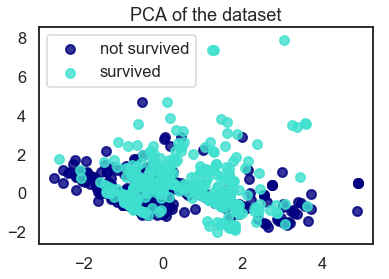

In [117]:
#http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

frame = ds
frame_train_y = frame.Survived.transpose().values

train_features = create_features_df(frame)
scaler = preprocessing.StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)

pca = PCA(n_components=2)
X_r = pca.fit(train_features).transform(train_features)
y = frame_train_y

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()

target_names = ['not survived', 'survived']
colors = ['navy', 'turquoise']
lw = 2

for i, color, target_name in zip([0,1], colors, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
            label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

plt.show()

### Playing with LDA

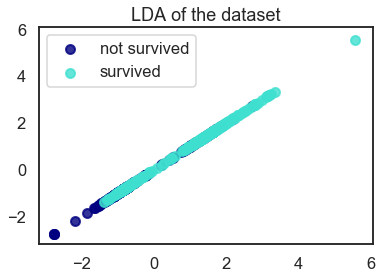

In [118]:
#It's no fit because n_components : int, optional
#Number of components (< n_classes - 1) for dimensionality reduction.
#We have 2 classes, so < 1
#http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis(n_components=2)
y = train_y
X_r2 = lda.fit(train_features, y).transform(train_features)

#display(X_r2)

plt.figure()

target_names = ['not survived', 'survived']
colors = ['navy', 'turquoise']
lw = 2

for i, color, target_name in zip([0,1], colors, target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], color=color, alpha=.8, lw=lw,
            label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of the dataset')

plt.show()

### Investigation of test data

#### Classes distribution

In [251]:
#display(test_ds.Pclass.values[0])
#display(test_ds[test_ds.Fare.isnull()].Pclass.values[0])
display(ds.groupby('Pclass').size() / ds.shape[0])
display(test_ds.groupby('Pclass').size() / test_ds.shape[0])

display(test_ds.groupby('Sex').size() / test_ds.shape[0])


Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

Pclass
1    0.255981
2    0.222488
3    0.521531
dtype: float64

Sex
female    0.363636
male      0.636364
dtype: float64

#### Sex distribution

In [120]:
display(ds.groupby('Sex').size() / ds.size)
display(test_ds.groupby('Sex').size() / test_ds.size)

Sex
female    0.015322
male      0.028156
dtype: float64

Sex
female    0.017316
male      0.030303
dtype: float64

In [148]:
#https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
import pandas as pd
import numpy as np

#rs = np.random.RandomState(0)

#ff = ds[ds.Pclass == 3]
#ff = ds[(ds.Sex == 'male') & (ds.AgeFilled > 18)]
#ff = ds[(ds.Sex == 'female') & (ds.AgeFilled > 18)]

ff = ds[(ds.AgeFilled <= 15)]
print(ff['Survived'].sum() / ff.shape[0])

#stat = ds[(ds.SexInt == 0) & (ds.Pclass == 3)].groupby('AgeBins')['Survived'].agg([np.size, np.sum])
#stat['rate'] = stat['sum']/stat['size']
print(ff.shape[0])

corr = ff.corr()
corr.style.background_gradient().set_precision(2)

#From link:
#In my testing, style.background_gradient() was 4x faster than plt.matshow()
# and 120x faster than sns.heatmap()with a 10x10 matrix. 
#Unfortunately it doesn't scale as well as plt.matshow(): 
# the two take about the same time for a 100x100 matrix, and plt.matshow() is 10x faster for a 1000x1000 matrix.

0.5862068965517241
87


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexInt,Prefix,AgeFilled,AgeBins,NameLen,SexScaled,ClassScaled,EmbarkedLabel,AgeDiv10,CabinBool,TicketLen
PassengerId,1,0.13,-0.061,0.022,-0.13,-0.027,0.028,-0.03,0.097,0.026,nan,-0.056,-0.03,-0.047,-0.085,0.026,-0.026,-0.091
Survived,0.13,1,-0.42,-0.15,-0.66,-0.19,-0.019,0.13,-0.07,-0.15,nan,0.15,0.13,-0.48,-0.18,-0.15,0.22,0.054
Pclass,-0.061,-0.42,1,0.072,0.36,-0.19,-0.69,-0.026,0.067,0.066,nan,-0.011,-0.026,0.95,-0.23,0.066,-0.6,-0.17
Age,0.022,-0.15,0.072,1,-0.057,-0.31,0.069,0.19,0.5,1,nan,0.093,0.19,0.13,-0.22,1,-0.098,-0.17
SibSp,-0.13,-0.66,0.36,-0.057,1,0.34,0.087,-0.3,-0.11,-0.06,nan,-0.0031,-0.3,0.38,0.26,-0.06,-0.23,0.036
Parch,-0.027,-0.19,-0.19,-0.31,0.34,1,0.35,-0.12,-0.28,-0.31,nan,0.14,-0.12,-0.14,0.47,-0.31,0.075,0.41
Fare,0.028,-0.019,-0.69,0.069,0.087,0.35,1,-0.043,-0.07,0.069,nan,0.076,-0.043,-0.48,0.28,0.069,0.57,0.074
SexInt,-0.03,0.13,-0.026,0.19,-0.3,-0.12,-0.043,1,0.38,0.19,nan,-0.018,1,-0.032,-0.13,0.19,-0.027,-0.073
Prefix,0.097,-0.07,0.067,0.5,-0.11,-0.28,-0.07,0.38,1,0.5,nan,-0.04,0.38,0.055,-0.3,0.5,-0.12,-0.15
AgeFilled,0.026,-0.15,0.066,1,-0.06,-0.31,0.069,0.19,0.5,1,nan,0.081,0.19,0.13,-0.21,1,-0.094,-0.16


### Metrics

In [87]:
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing


classifiers = [
    #KNeighborsClassifier(3),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    svm.SVC(kernel='rbf', gamma=0.3, C=2),
    #LogisticRegression(),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
]

get_cl_name = lambda x: str(x).split('(')[0]

#x_features = train_features_ext

x_features = pd.DataFrame([ds.SexScaled, ds.ClassScaled, ds.AgeFilled, ds.SibSp + ds.Parch, ds.Fare]).transpose().values

scaler = preprocessing.StandardScaler().fit(x_features)
train_features_std = scaler.transform(x_features)

normalizer = preprocessing.Normalizer().fit(x_features) 
train_features_norm = normalizer.transform(x_features)
#train_features_std_norm = preprocessing.normalize(train_features_std, norm='l2')
#display(train_features_norm)

max_acc = 0
max_acc_name = ''
for model in classifiers:
    features = train_features_std

    predicted = model_selection.cross_val_predict(model, features, train_y, cv=5)
    acc = metrics.accuracy_score(train_y, predicted)
    if acc > max_acc:
        max_acc= acc
        max_acc_name = str(model)
    
    print('****** {0} ******'.format(get_cl_name(model)))

    print('Total metrics for classifier:')
    print('Accuracy: {0}'.format(acc))
    print(metrics.classification_report(train_y, predicted))

    if True:
        for i in [1,2,3]:
            print('Metrics for class {}'.format(i))
            cl = (ds.Pclass == i) #& (ds.SexInt == 0)

            #clmens = features[cl][:,[2,3]]
            #y_clmens = train_y[cl]
            acc = metrics.accuracy_score(train_y[cl], predicted[cl])
            print('Accuracy: {}'.format(acc))
            print(metrics.classification_report(train_y[cl], predicted[cl]))
print('Max acc is {} for {}'.format(max_acc, max_acc_name))

****** SVC ******
Total metrics for classifier:
Accuracy: 0.8294051627384961
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       549
           1       0.83      0.70      0.76       342

   micro avg       0.83      0.83      0.83       891
   macro avg       0.83      0.81      0.81       891
weighted avg       0.83      0.83      0.83       891

Metrics for class 1
Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        80
           1       0.96      0.71      0.81       136

   micro avg       0.80      0.80      0.80       216
   macro avg       0.81      0.83      0.79       216
weighted avg       0.85      0.80      0.80       216

Metrics for class 2
Accuracy: 0.9239130434782609
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        97
           1       0.93      0.91      0.92        87

   micr

ValueError: query data dimension must match training data dimension

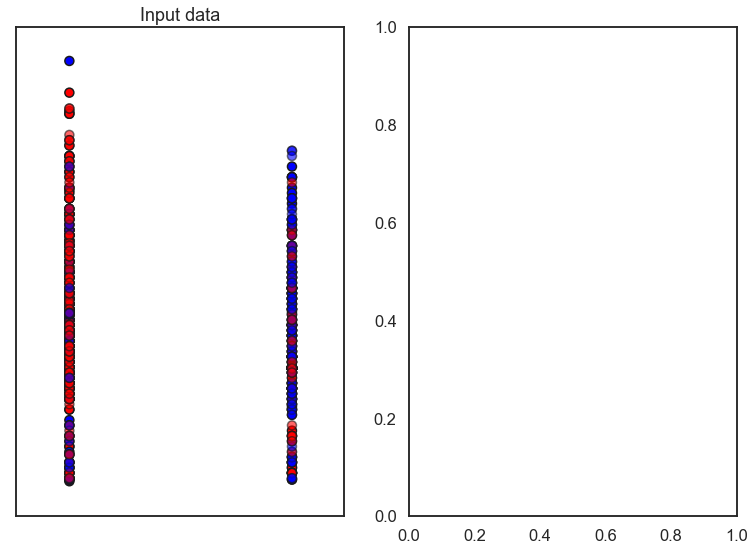

In [88]:
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
]

X = train_features
y = frame_train_y

linearly_separable = (X, y)

datasets = [
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### ROC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X = train_features
y = train_y

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
#model = svm.SVC(kernel='rbf', gamma=0.5, C=1, probability=True, random_state=random_state)
#model = svm.SVC(kernel='linear', probability=True, random_state=random_state)
model = LogisticRegression()

classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### ROC cross validation

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = train_features
y = train_y
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
#classifier = svm.SVC(kernel='rbf', gamma=0.5, C=1, probability=True,
#                     random_state=random_state)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Embarked

In [ ]:
embarked_values={'S':0, 'C':1, 'Q':2}

embarked_values = ds_age_notnull.Embarked.map(lambda x: embarked_values[x] if x in embarked_values else 0)

ds_age_notnull_age_div_10_embarked = ds_age_notnull['Age'].map(lambda x: x / 10)
linear_svm_train_features4_age_dev10_embarked = pd.DataFrame([sex_int, ds_age_notnull.Pclass, ds_age_notnull_age_div_10_embarked, embarked_values]).transpose().values

linear_svm_model3_ag_d10_embarked = svm.SVC(kernel='rbf', gamma=2, C=1)
scores = cross_val_score(linear_svm_model3_ag_d10_embarked, linear_svm_train_features4_age_dev10_embarked, linear_svm_train_y3, n_jobs=2, cv=shuffle5_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Fare investigation

First we can see if survivability depends on fare whithin the same class
Lets start from the biggest class 3

In [ ]:
#class3_fares = ds[(ds.Pclass == 3)].Fare.map(lambda x: (int)(x / 10))
class3_df = ds[(ds.Pclass == 3)]
class3_fares = class3_df.Fare.map(lambda x: 0 if x < 10 else 1)
#for some reason pandas converts class3_fares to float64 after pd.concat althogh dtype of Series is int64
#it may be due to na promotion - https://stackoverflow.com/questions/41870093/pandas-shift-converts-my-column-from-integer-to-float
#but I failed to find any nan/na in Fare
#even after class3_fares.fillna(0) type still float64
#Reason: Fare ARE ONLY FOR CLASS 3! But Survived for ALL CASSES!
print(class3_fares.dtype)
print(ds.Survived.dtype)

class3_fares_df = pd.concat([ds[(ds.Pclass == 3)].Survived, class3_fares], axis=1)
#class3_fares_df = pd.DataFrame({'FareClass': class3_fares, 'Survived':ds[(ds.Pclass == 3)].Survived})

class3_fares_df.groupby('Fare').agg([np.sum, np.mean, np.std])

### Cabin investigation

In [ ]:
cabin_prefix = {'A':1, 'B':2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
#print(ds[(ds.Cabin.notnull()) & (ds.Cabin.str.startswith('G'))])
#prefixes = ds.Cabin.map(lambda x: str(x)[0] if x else '').unique()
#print(prefixes)

#1. All classes
#cabin_indexes = ds.Cabin.map(lambda x: cabin_prefix[str(x)[0]] if x and str(x)[0] in cabin_prefix else 0)
#2 2 classes - with/without cabin
cabins_df = ds #class3_df

cabin_indexes = cabins_df.Cabin.map(lambda x: 1 if x and str(x)[0] in cabin_prefix else 0)
surv_cabins = pd.DataFrame([cabins_df.Survived, cabin_indexes]).transpose()
#display(surv_cabins)
display(surv_cabins.groupby('Cabin').agg([np.sum, np.mean, np.std]))

print(cabins_df[(cabins_df.Cabin.notnull()) & (cabins_df.Pclass == 3)].Survived)